# Imports

In [31]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import csv
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import wilcoxon, mannwhitneyu
from itertools import combinations 
import scipy.stats as stats
import scipy
from scipy.stats import ttest_ind
from scipy.stats import fisher_exact

# autoreload
%load_ext autoreload
%autoreload 2

import warnings
warnings.filterwarnings('ignore')

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import learning_curve
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import accuracy_score, precision_score, recall_score

from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score, classification_report

# Hypothesis test

Null Hypothesis (H0): There is no significant association between the category (alcohol consumption, fruit consumption, green vegetable consumption, fried potato consumption) and the presence of Heart_Disease.

Alternative Hypothesis (Ha): There is a significant association between the category (alcohol consumption, fruit consumption, green vegetable consumption, fried potato consumption) and the presence of Heart_Disease.

# Import the DataFrame

In [33]:
cardio = pd.read_csv('../data/Cardiovascular_cleaned.csv')
cardio.shape

(308854, 19)

In [34]:
cardio.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


# Changing the DataFrame. Details below. 

## Changes Sex column to binary with Male=1 and Female=0

In [35]:
# Convert 'Female' and 'Male' in the 'Sex' column to 0 and 1, respectively
cardio['Sex'] = cardio['Sex'].replace({'Female': 0, 'Male': 1})

## Takes columns with (yes / no ) and changes them to 1=Yes and 0=No

In [36]:
# Map binary categorical variables to 0 and 1
binary_cols = ['Heart_Disease', 'Exercise', 'Skin_Cancer', 'Other_Cancer', 'Depression', 'Arthritis', 'Smoking_History']
cardio[binary_cols] = cardio[binary_cols].replace({'No': 0, 'Yes': 1})

# Confirm the encoding
print(cardio[binary_cols].head())

   Heart_Disease  Exercise  Skin_Cancer  Other_Cancer  Depression  Arthritis  \
0              0         0            0             0           0          1   
1              1         0            0             0           0          0   
2              0         1            0             0           0          0   
3              1         1            0             0           0          0   
4              0         0            0             0           0          0   

   Smoking_History  
0                1  
1                0  
2                0  
3                0  
4                1  


### head() to see results

In [37]:
cardio.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,0,0,0,0,0,No,1,0,70-74,150.0,32.66,14.54,1,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,0,1,0,0,0,Yes,0,0,70-74,165.0,77.11,28.29,0,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,1,0,0,0,0,Yes,0,0,60-64,163.0,88.45,33.47,0,4.0,12.0,3.0,16.0
3,Poor,Within the past year,1,1,0,0,0,Yes,0,1,75-79,180.0,93.44,28.73,0,0.0,30.0,30.0,8.0
4,Good,Within the past year,0,0,0,0,0,No,0,1,80+,191.0,88.45,24.37,1,0.0,8.0,4.0,0.0


### Changes columns General Health , Diabetes, and Checkup from object to binary columns with get-dummies

In [38]:
# Apply one-hot encoding to 'General_Health', 'Checkup', and 'Diabetes' columns
cardio = pd.get_dummies(cardio, columns=['General_Health', 'Checkup', 'Diabetes'], drop_first=True)

# Verify the DataFrame after preprocessing
print(cardio.head())

   Exercise  Heart_Disease  Skin_Cancer  Other_Cancer  Depression  Arthritis  \
0         0              0            0             0           0          1   
1         0              1            0             0           0          0   
2         1              0            0             0           0          0   
3         1              1            0             0           0          0   
4         0              0            0             0           0          0   

   Sex Age_Category  Height_(cm)  Weight_(kg)  ...  General_Health_Good  \
0    0        70-74        150.0        32.66  ...                    0   
1    0        70-74        165.0        77.11  ...                    0   
2    0        60-64        163.0        88.45  ...                    0   
3    1        75-79        180.0        93.44  ...                    0   
4    1          80+        191.0        88.45  ...                    1   

   General_Health_Poor  General_Health_Very Good  Checkup_Never  \
0

### Changes Age_Category to Average_Age

In [39]:
Average_Age = []
for number in cardio['Age_Category']:
    if '-' in number:
        new = number.split('-')
        Average_Age.append((int(new[0]) + int(new[1])) / 2)
    else: 
        Average_Age.append(85)

# cardio['Average_Age'] = Average_Age

# cardio = cardio.drop(columns = 'Age_Category')

'''
Due to the last age group being 80+ with no upper limit I guessed and 
put the highest age at 85. This my impact things at the highest age range
'''

In [40]:
cardio['Average_Age'] = Average_Age

In [41]:
cardio = cardio.drop(columns = 'Age_Category')

In [42]:
cardio.head()

,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Arthritis,Sex,Height_(cm),Weight_(kg),BMI,...,General_Health_Poor,General_Health_Very Good,Checkup_Never,Checkup_Within the past 2 years,Checkup_Within the past 5 years,Checkup_Within the past year,"Diabetes_No, pre-diabetes or borderline diabetes",Diabetes_Yes,"Diabetes_Yes, but female told only during pregnancy",Average_Age
0,0,0,0,0,0,1,0,150.0,32.66,14.54,...,1,0,0,1,0,0,0,0,0,72.0
1,0,1,0,0,0,0,0,165.0,77.11,28.29,...,0,1,0,0,0,1,0,1,0,72.0
2,1,0,0,0,0,0,0,163.0,88.45,33.47,...,0,1,0,0,0,1,0,1,0,62.0
3,1,1,0,0,0,0,1,180.0,93.44,28.73,...,1,0,0,0,0,1,0,1,0,77.0
4,0,0,0,0,0,0,1,191.0,88.45,24.37,...,0,0,0,0,0,1,0,0,0,85.0


# Everything is now a number. Onward to the Logistic Regression! Huzha!

# ...but first a few graphs

array([[<Axes: title={'center': 'Exercise'}>,
        <Axes: title={'center': 'Heart_Disease'}>,
        <Axes: title={'center': 'Skin_Cancer'}>,
        <Axes: title={'center': 'Other_Cancer'}>,
        <Axes: title={'center': 'Depression'}>],
       [<Axes: title={'center': 'Arthritis'}>,
        <Axes: title={'center': 'Sex'}>,
        <Axes: title={'center': 'Height_(cm)'}>,
        <Axes: title={'center': 'Weight_(kg)'}>,
        <Axes: title={'center': 'BMI'}>],
       [<Axes: title={'center': 'Smoking_History'}>,
        <Axes: title={'center': 'Alcohol_Consumption'}>,
        <Axes: title={'center': 'Fruit_Consumption'}>,
        <Axes: title={'center': 'Green_Vegetables_Consumption'}>,
        <Axes: title={'center': 'FriedPotato_Consumption'}>],
       [<Axes: title={'center': 'General_Health_Fair'}>,
        <Axes: title={'center': 'General_Health_Good'}>,
        <Axes: title={'center': 'General_Health_Poor'}>,
        <Axes: title={'center': 'General_Health_Very Good'}>,
 

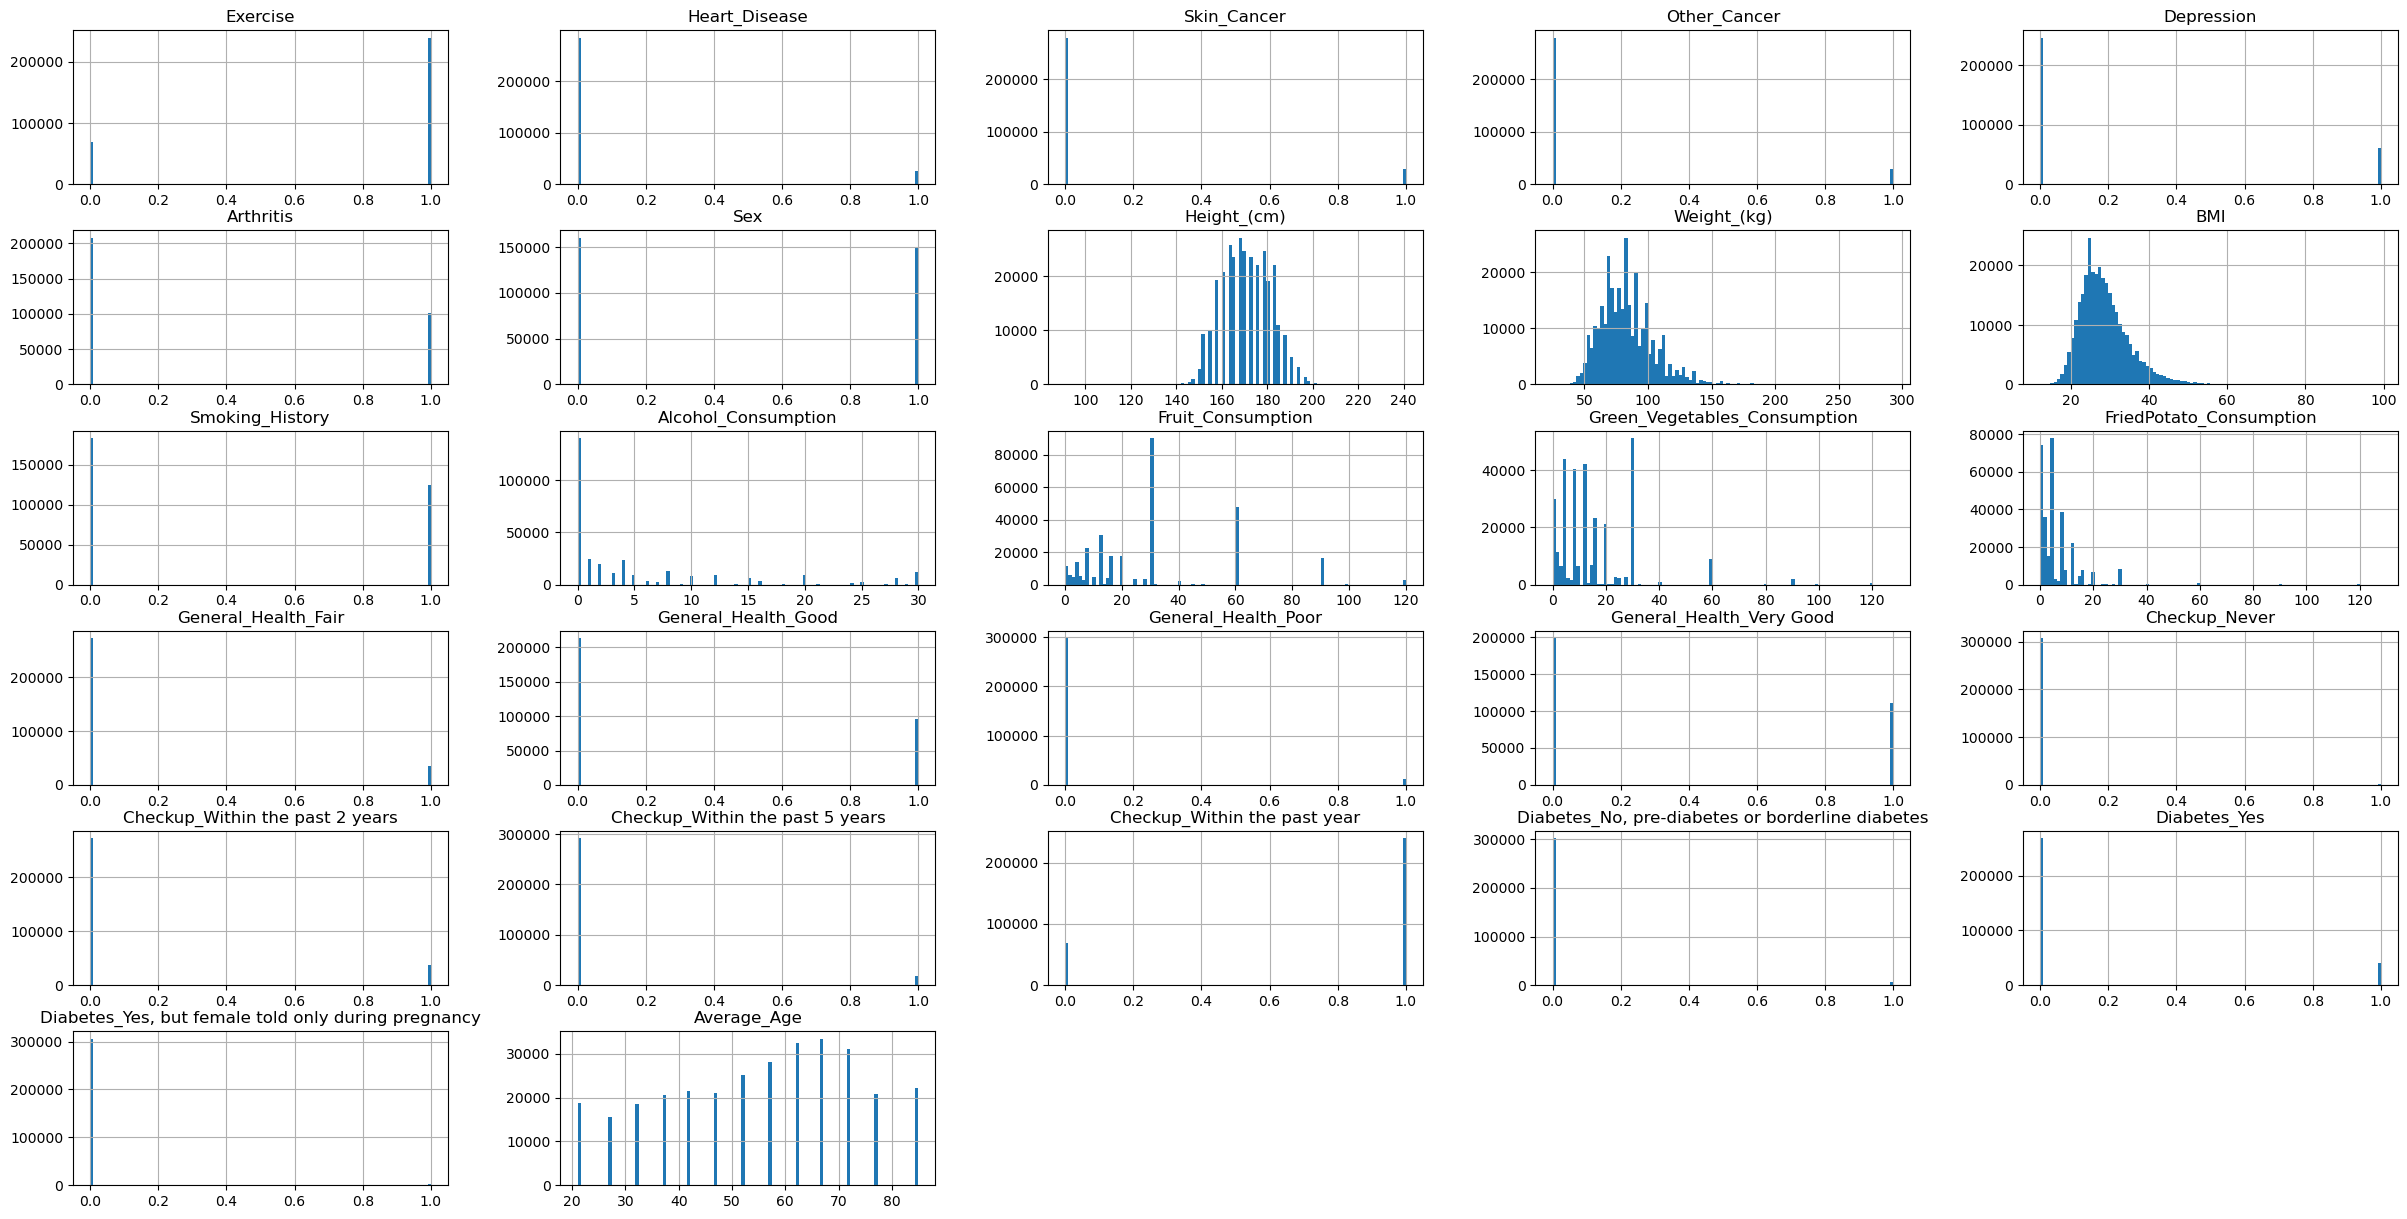

In [43]:
cardio.hist(bins=100, figsize = [30, 15])